In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import time
import datetime as dt
from datetime import date,timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])



id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_record = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date = last_record[0]
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')
print(last_date)


2017-08-23 00:00:00


In [14]:
# Calculate the date one year from the last date in data set.
year_ago = last_date - dt.timedelta(days=365)
print(year_ago)

2016-08-23 00:00:00


In [15]:
# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,measurement.prcp]
precipitation_info = session.query(*sel).\
    filter(measurement.date >= year_ago).\
    order_by(measurement.date).all()
precipitation_info

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [16]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_info, columns=['Date','Precipitation'])
precipitation_df = precipitation_df.dropna()
precipitation_df = precipitation_df.set_index('Date')
precipitation_info


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [17]:
# Sort the dataframe by date
precipitation_df.sort_values(by='Date', inplace=True)

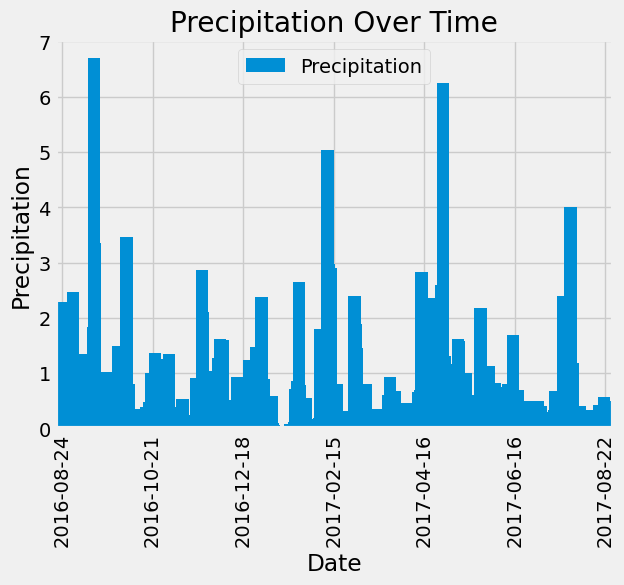

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot.bar(width=45)
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')
tick_locations = range(0, len(precipitation_df.index), len(precipitation_df.index) // 6)
plt.xticks(tick_locations, precipitation_df.index[tick_locations], rotation=90)
plt.show()



In [102]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(measurement.station.distinct())).scalar()
station_count


9

In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# sel_2 = [measurement.station, measurement.date, measurement.prcp, measurement.tobs]

sel_2 = [measurement.station, func.count(measurement.date).label('observation_count')]
station_info = session.query(*sel_2).\
    group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).all()

for station in station_info:
    print(station.station,station.observation_count)



USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
temperature_info = session.query(
    func.min(measurement.tobs).label('min_temp'),
    func.max(measurement.tobs).label('max_temp'),
    func.avg(measurement.tobs).label('avg_temp')
).filter(measurement.station == most_active).all()

for t in temperature_info:
    print(t.min_temp)
    print(t.max_temp)
    print(t.avg_temp)



54.0
85.0
71.66378066378067


In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel_3 = [measurement.date,measurement.tobs]
temp_last_year= session.query(*sel_3).\
    filter(measurement.date >= year_ago).\
    order_by(measurement.date).all()
temp_last_year

temp_df = pd.DataFrame(temp_last_year, columns=['Date','Temperature'])
temp_df = temp_df.dropna()

temp_df.head(10)


,Date,Temperature
0,2016-08-24,79.0
1,2016-08-24,76.0
2,2016-08-24,80.0
3,2016-08-24,78.0
4,2016-08-24,79.0
5,2016-08-24,77.0
6,2016-08-24,74.0
7,2016-08-25,80.0
8,2016-08-25,77.0
9,2016-08-25,81.0


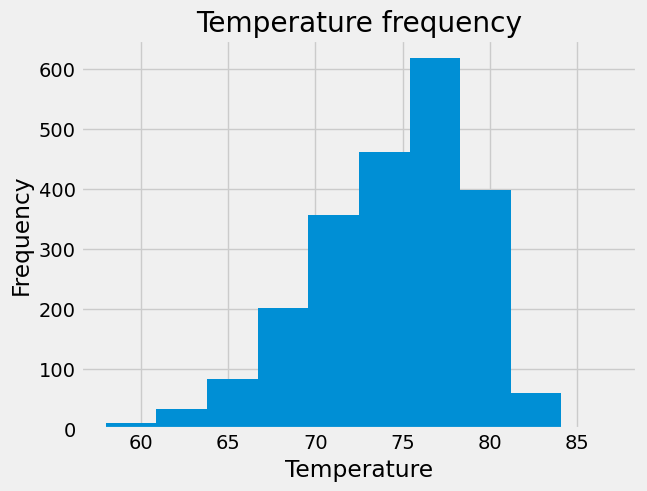

In [61]:
plt.hist(temp_df['Temperature'])
plt.title('Temperature frequency')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [58]:
# Close Session
session.close()